In [3]:
%load_ext autoreload
%autoreload 2
import sys
from matplotlib.backends.backend_pdf import PdfPages
sys.path.append('../..')
sys.path.append( '/home/cactuskid13/miniconda3/pkgs/')
print(sys.path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/home/cactuskid13/pyprofiler/pyprofiler/notebooks', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python37.zip', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/lib-dynload', '', '/home/cactuskid13/.local/lib/python3.7/site-packages', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages', '/home/cactuskid13/pyham', '/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/IPython/extensions', '/home/cactuskid13/.ipython', '../..', '/home/cactuskid13/miniconda3/pkgs/', '../..', '/home/cactuskid13/miniconda3/pkgs/', '../..', '/home/cactuskid13/miniconda3/pkgs/']


In [4]:
#using the profiler. It's easy!
#lets import the profiler, configuration file and some tools for GO analysis to look at our returned results
from pyprofiler.utils import config_utils
import pyprofiler.utils.goatools_utils as goa
import pyprofiler.profiler as profiler



{'dir': {'datadir': '/home/cactuskid13/pyprofiler/pyprofiler/all/all512/', 'omadir': '/home/cactuskid13/mntpt/OMA/jun/'}, 'orthoxmltar': '', 'email': 'dmoi@unil.ch'}


In [5]:
#lets also create a go annotation enrichment study object to describe functional enrichment in our profiling results
gaf = goa.buildGAF( '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/oma-go.txt' )
study = goa.return_enrichment_study_obj( gaf , obo = '/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo')

/home/cactuskid13/mntpt/unil_backup/profilingbackup/gaf/go.obo: fmt(1.2) rel(2019-07-01) 47,413 GO Terms

Load GOEA Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
100% 8,270,255 of 8,270,255 population items found in association


In [6]:
#lets load a compiled db containing the OMA root HOGs into a profiler oject 
p = profiler.Profiler(lshforestpath = config_utils.datadir+ 'newlshforest.pkl' , hashes_h5=config_utils.datadir  +'hashes.h5' , mat_path= None, oma = True, tar= None , nsamples = 512)

loading lsh
indexing lsh


Cannot load SequenceSearch. Any future call to seq_search will fail!
Traceback (most recent call last):
  File "../../pyprofiler/pyoma/browser/db.py", line 879, in __init__
    self.seq_idx = self.seq_idx()
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/link.py", line 397, in __call__
    self.extfile = tables.open_file(filename, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 320, in open_file
    return File(filename, mode, title, root_uep, filters, **kwargs)
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/file.py", line 784, in __init__
    self._g_new(filename, mode, **params)
  File "tables/hdf5extension.pyx", line 374, in tables.hdf5extension.File._g_new
  File "/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/tables/utils.py", line 157, in check_file_access
    raise IOError("``%s`` does not exist" % (filena

3146
DONE


In [7]:
import pandas as pd
import numpy as np

def grabHog(ID):
    try:
        return p.db_obj.entry_by_entry_nr(p.db_obj.id_resolver.resolve(ID))[4].decode()
    except:
        return np.nan
    

#map to OMA HOGs

In [8]:
#load the kinetochore data and map it to OMA HOGs
#these are blast results against oma since they had their own adhoc IDs

kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv', header = None)
#filter by evalue
kinetodf= kinetodf[kinetodf[10]< .000001]
kinetodf['name'] = kinetodf.index.map( lambda x : x.split('_')[-1] )

kinetodf['HOG'] = kinetodf[1].map(grabHog)
print(kinetodf.head())
kinetodf.to_csv('kineto_mapping.csv')

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


                                              1        2     3   4  5  6  \
0                                                                          
Homo_sapiens_HSAP017770_ANAPC1_Apc1  HUMAN17502  100.000  1944   0  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28459   99.743  1944   5  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  CHLSB04039   99.383  1944  12  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PAPAN05104   99.331  1944  13  0  1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  PANTR28460   99.126  1945  14  2  1   

                                        7  8     9   10      11    12  13  \
0                                                                           
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4029.0  Apc1 NaN   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4017.0  Apc1 NaN   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1 NaN   
Homo_sapiens_HSAP017770_ANAPC1_Apc1  1944  1  1944  0.0  4007.0  Apc1 NaN   
Homo_

In [9]:
kinetodf = pd.DataFrame.from_csv('kineto_mapping.csv')

kinetodf = kinetodf.dropna(subset=['HOG'] , axis=0)
print(kinetodf)

                                                1        2     3    4   5  \
0                                                                           
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HUMAN17502  100.000  1944    0   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CHLSB04039   99.383  1944   12   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PAPAN05104   99.331  1944   13   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PANTR28460   99.126  1945   14   2   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CALJA06361   98.405  1944   30   1   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    FELCA03737   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    HORSE05873   97.171  1944   55   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    MUSPF05472   97.274  1944   53   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    RABIT08361   96.914  1944   60   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    PIGXX21392   96.862  1944   61   0   
Homo_sapiens_HSAP017770_ANAPC1_Apc1    CANLF05104   96.109  1953   66   4   

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [10]:
#lets search for interactors of each HOG in our dataset and map them back to the dataframe
from pyprofiler.utils.hashutils import hogid2fam
#print(kinetodf)
print(len(kinetodf.HOG.unique()))
print(len(kinetodf.name.unique()))
kinetodf['topHOG'] = kinetodf.HOG.map(lambda x : str(x).split('.')[0])
Hogs = []

#lets just grab the top one closest to the human sequence with a HOG ID
for n in kinetodf.name.unique():
    sub = kinetodf[kinetodf.name == n ]
    for Hog in list(sub.topHOG.unique())[0:3]:
        if len(Hog)>0:
            Hogs.append(Hog)
print(Hogs)
print(len(set(Hogs)))

4200
89
['HOG:0397431', 'HOG:0409203', 'HOG:0390733', 'HOG:0217889', 'HOG:0373006', 'HOG:0354438', 'HOG:0394532', 'HOG:0371013', 'HOG:0605249', 'HOG:0420946', 'HOG:0420607', 'HOG:0172386', 'HOG:0366264', 'HOG:0603663', 'HOG:0352864', 'HOG:0354613', 'HOG:0383489', 'HOG:0357260', 'HOG:0363570', 'HOG:0379370', 'HOG:0366226', 'HOG:0218415', 'HOG:0252529', 'HOG:0255123', 'HOG:0372963', 'HOG:0365955', 'HOG:0393988', 'HOG:0260009', 'HOG:0214005', 'HOG:0375966', 'HOG:0327049', 'HOG:0334576', 'HOG:0390011', 'HOG:0340198', 'HOG:0420308', 'HOG:0365745', 'HOG:0362181', 'HOG:0368754', 'HOG:0392167', 'HOG:0389803', 'HOG:0403265', 'HOG:0358495', 'HOG:0353946', 'HOG:0381237', 'HOG:0413144', 'HOG:0364121', 'HOG:0367903', 'HOG:0366348', 'HOG:0359514', 'HOG:0343396', 'HOG:0217941', 'HOG:0406831', 'HOG:0347716', 'HOG:0381148', 'HOG:0362214', 'HOG:0357309', 'HOG:0359359', 'HOG:0403075', 'HOG:0612245', 'HOG:0408684', 'HOG:0408225', 'HOG:0355083', 'HOG:0114188', 'HOG:0218352', 'HOG:0369639', 'HOG:0395896', '

In [11]:
#now we can make a second dataframe with the hash signatures of each of our queries
#reading the hdf5 and grabbing all the hash signatures may take a moment
profiles = p.pull_hashes( set(Hogs) )
names = dict( zip( kinetodf.HOG , kinetodf.name) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  }  for h in profiles if h in names}
profiles = pd.DataFrame.from_dict( profiles , orient='index' )
print(profiles.head())
print(len(profiles))
print(len(profiles.name.unique()))
profiles = profiles.drop_duplicates( subset = 'name', keep = 'last')
print(len(profiles))
print(profiles)

                                                       hashsig    name
HOG:0175698  <datasketch.weighted_minhash.WeightedMinHash o...  Nup107
HOG:0214005  <datasketch.weighted_minhash.WeightedMinHash o...    Dad4
HOG:0216232  <datasketch.weighted_minhash.WeightedMinHash o...    Dad3
HOG:0217836  <datasketch.weighted_minhash.WeightedMinHash o...    Hsk3
HOG:0217853  <datasketch.weighted_minhash.WeightedMinHash o...   Spc19
166
84
84
                                                       hashsig      name
HOG:0217836  <datasketch.weighted_minhash.WeightedMinHash o...      Hsk3
HOG:0217853  <datasketch.weighted_minhash.WeightedMinHash o...     Spc19
HOG:0217889  <datasketch.weighted_minhash.WeightedMinHash o...      Duo1
HOG:0217941  <datasketch.weighted_minhash.WeightedMinHash o...     Ndc10
HOG:0218162  <datasketch.weighted_minhash.WeightedMinHash o...     Ctf13
HOG:0218352  <datasketch.weighted_minhash.WeightedMinHash o...      Apc9
HOG:0218715  <datasketch.weighted_minhash.WeightedMin

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import colour
#we can perform an all vs all comparison to replicate the results in va hoof et al
import time 



with PdfPages('kineto_hash.pdf') as pdf:
    print(len(list(profiles.hashsig)) )
    start = time.time()
    print( list( profiles.hashsig )[0].jaccard(list(profiles.hashsig)[1]) )       
    print(time.time()-start)

    jkern = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles.hashsig)) ] for i,h1 in enumerate(list(profiles.hashsig))]


    jkern = np.asarray(jkern)
    jkern+=jkern.T
    np.fill_diagonal( jkern , 1 )
    print(jkern)
    g = sns.clustermap( jkern , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20) )


    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)
    pdf.savefig()


    plt.show()

84
0.19921875
0.0026862621307373047
[[1.         0.19921875 0.85742188 ... 0.         0.         0.        ]
 [0.19921875 1.         0.20117188 ... 0.         0.         0.        ]
 [0.85742188 0.20117188 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.18945312 0.        ]
 [0.         0.         0.         ... 0.18945312 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


<Figure size 2000x2000 with 4 Axes>

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


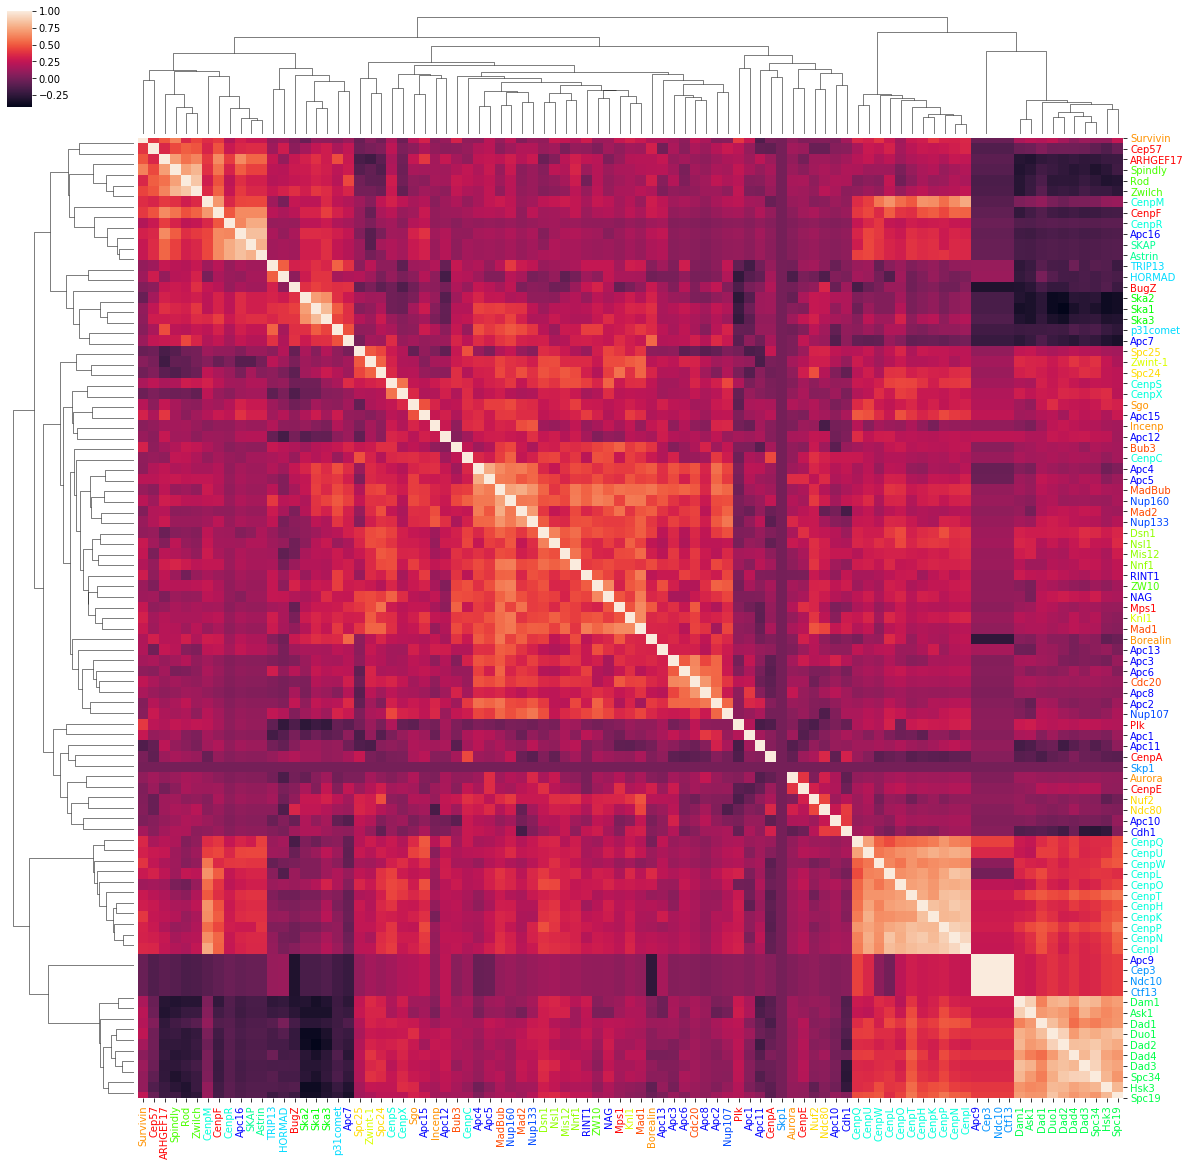

In [13]:
#lets load the original pearson correlation data and compare to our jaccard similarity metric
pearsondf = pd.DataFrame.from_csv('./kinetocore_pearson.csv')

with PdfPages('kineto_pearson.pdf') as pdf:

    g = sns.clustermap( pearsondf , xticklabels= pearsondf.index , yticklabels= pearsondf.index , figsize = (20,20) )

    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)


    pdf.savefig()

    plt.show()


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


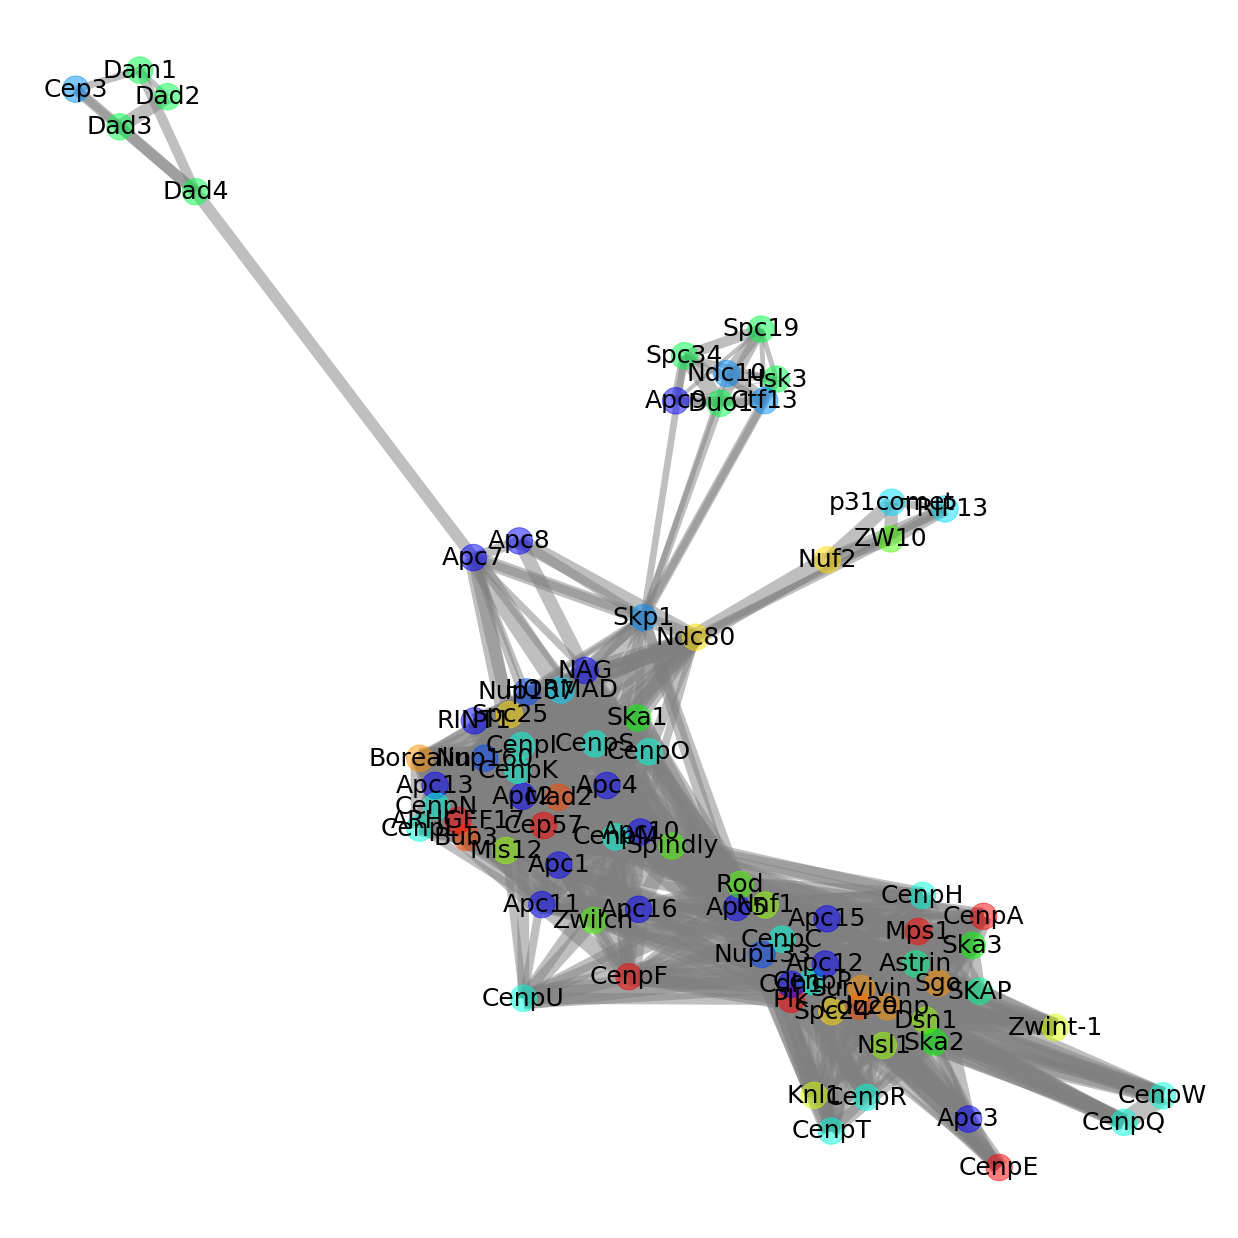

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


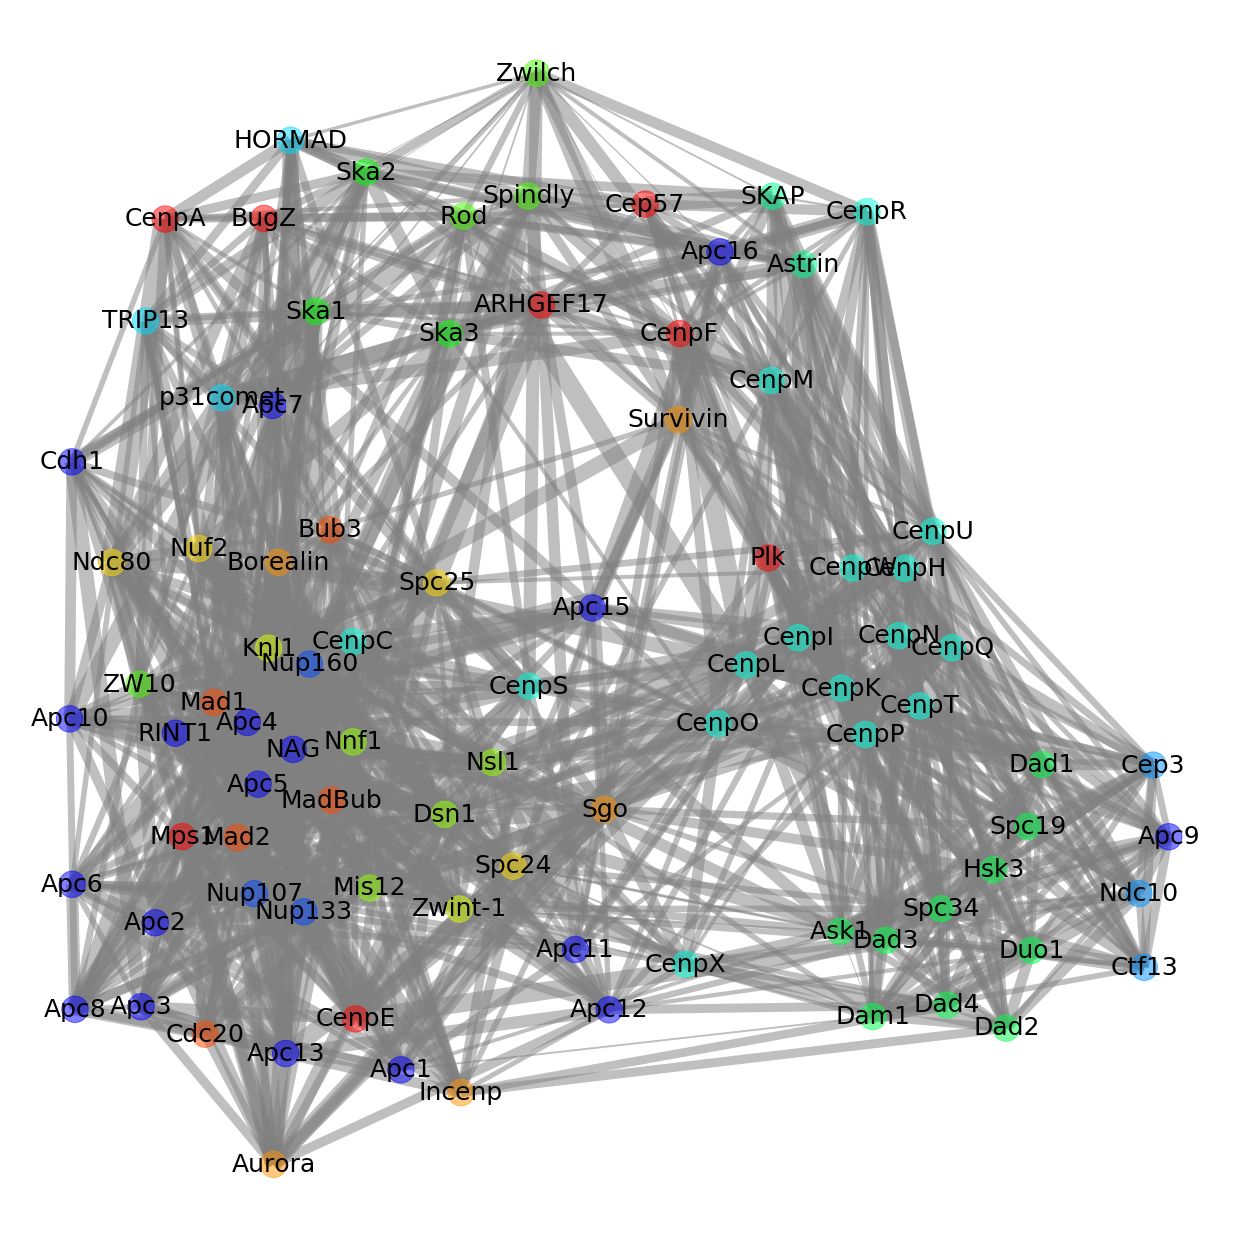

In [14]:
#lets compare the organisation of the complex in both as graph structures
import networkx as nx
pG = nx.from_numpy_matrix( pearsondf.to_numpy() )
jG = nx.from_numpy_matrix( jkern )
pG = nx.relabel_nodes( pG , { i:p for i,p in enumerate(pearsondf.index) })
jG = nx.relabel_nodes( jG , { i:p for i,p in enumerate(profiles.name) })
print(pG)
print(jG)
alledges={}
shared={}
topk = 20

for g in [jG, pG]:
    finalg = nx.Graph()
    for n in g.nodes():
        alledges = [ (n,l) for l in g.neighbors(n) if n != l ]
        weights = [ g[e[0]][e[1]]['weight'] for e in alledges]
        keep = np.flip(np.argsort(weights))[0:topk]
        edges = [ alledges[s] for s in list(keep) ]
        [  finalg.add_edge(e[0],e[1], weight= max(1/(i +1),g[e[0]][e[1]]['weight']) ) if finalg.has_edge(e[0],e[1]) else finalg.add_edge(e[0],e[1], weight= g[e[0]][e[1]]['weight']) for i,e in enumerate(edges)   ]
    pos = nx.spring_layout( finalg , weight='weight')
    weights = np.asarray([e[2]['weight'] for e in g.edges(data = True)])
    plt.figure( figsize = (17,17))
    cvec = [ colordict[n] if n in colordict else 'black' for n in finalg.nodes()]
    nx.draw(finalg, pos=pos, edge_color='grey', width= 5*np.log( weights ), node_size= 700, node_color = cvec ,alpha = .5 ) 
    labels=nx.draw_networkx_labels(finalg , pos = pos , font_size= 25 )
    plt.show()


In [15]:
from scipy.stats import pearsonr , spearmanr , brunnermunzel
pearsondf = pearsondf[profiles.name]
pearsondf = pearsondf.loc[profiles.name]
pearsonmat = pearsondf.to_numpy()
print(pearsonmat.shape)

print(jkern.shape)
print('spearman')
print( spearmanr( pearsonmat.ravel(), jkern.ravel() ))
print( 'pearson')
print( pearsonr( pearsonmat.ravel(), jkern.ravel() ))
print('permutation')
print( brunnermunzel( pearsonmat.ravel(), jkern.ravel() ))

(84, 84)
(84, 84)
spearman
SpearmanrResult(correlation=0.15506484906773868, pvalue=3.1874470216737904e-39)
pearson
(0.3762119900518547, 4.371853556457976e-236)
permutation
BrunnerMunzelResult(statistic=-71.60755971761836, pvalue=0.0)


In [16]:
#now we can add in the HOGs we found in our search
#the clustering shows a similar structure
print(len(profiles.index))

#lets query the the lsh with each HOG
res = { h: p.hog_query(hog_id= h, k = 10 ) for h in list(profiles.index) }
profiles_full = p.pull_hashes( set(res.keys()).union( set( [ h for results in res.values() for h in results ] ) ) )

names = dict( zip( kinetodf.HOG , kinetodf.name) )

profiles_ = { h: {'hashsig': profiles_full[h] , 'name': names[h]  } if h in names else {'hashsig': profiles_full[h] , 'name': ''  }   for h in profiles_full }

profiles_full = pd.DataFrame.from_dict( profiles_ , orient='index' )

print(profiles_full)
print(len(profiles_full))


84
                                                       hashsig      name
216118       <datasketch.weighted_minhash.WeightedMinHash o...          
216200       <datasketch.weighted_minhash.WeightedMinHash o...          
216237       <datasketch.weighted_minhash.WeightedMinHash o...          
216259       <datasketch.weighted_minhash.WeightedMinHash o...          
216267       <datasketch.weighted_minhash.WeightedMinHash o...          
216277       <datasketch.weighted_minhash.WeightedMinHash o...          
216278       <datasketch.weighted_minhash.WeightedMinHash o...          
216392       <datasketch.weighted_minhash.WeightedMinHash o...          
216412       <datasketch.weighted_minhash.WeightedMinHash o...          
216457       <datasketch.weighted_minhash.WeightedMinHash o...          
216638       <datasketch.weighted_minhash.WeightedMinHash o...          
216663       <datasketch.weighted_minhash.WeightedMinHash o...          
216713       <datasketch.weighted_minhash.Weight

In [17]:
#whats inside the matrix



In [18]:
#lets perform and enrichment on each cluster to see if we were able to pull down some functional modules
#some of these results may be unknown kinetochore proteins under an open world assumption
jkern0 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(list(profiles_full.hashsig) ) ] for i,h1 in enumerate(list( profiles_full.hashsig ) ) ]
jkern0 = np.asarray(jkern0)
jkern0+=jkern0.T
np.fill_diagonal( jkern0 , 1 )

(143,)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


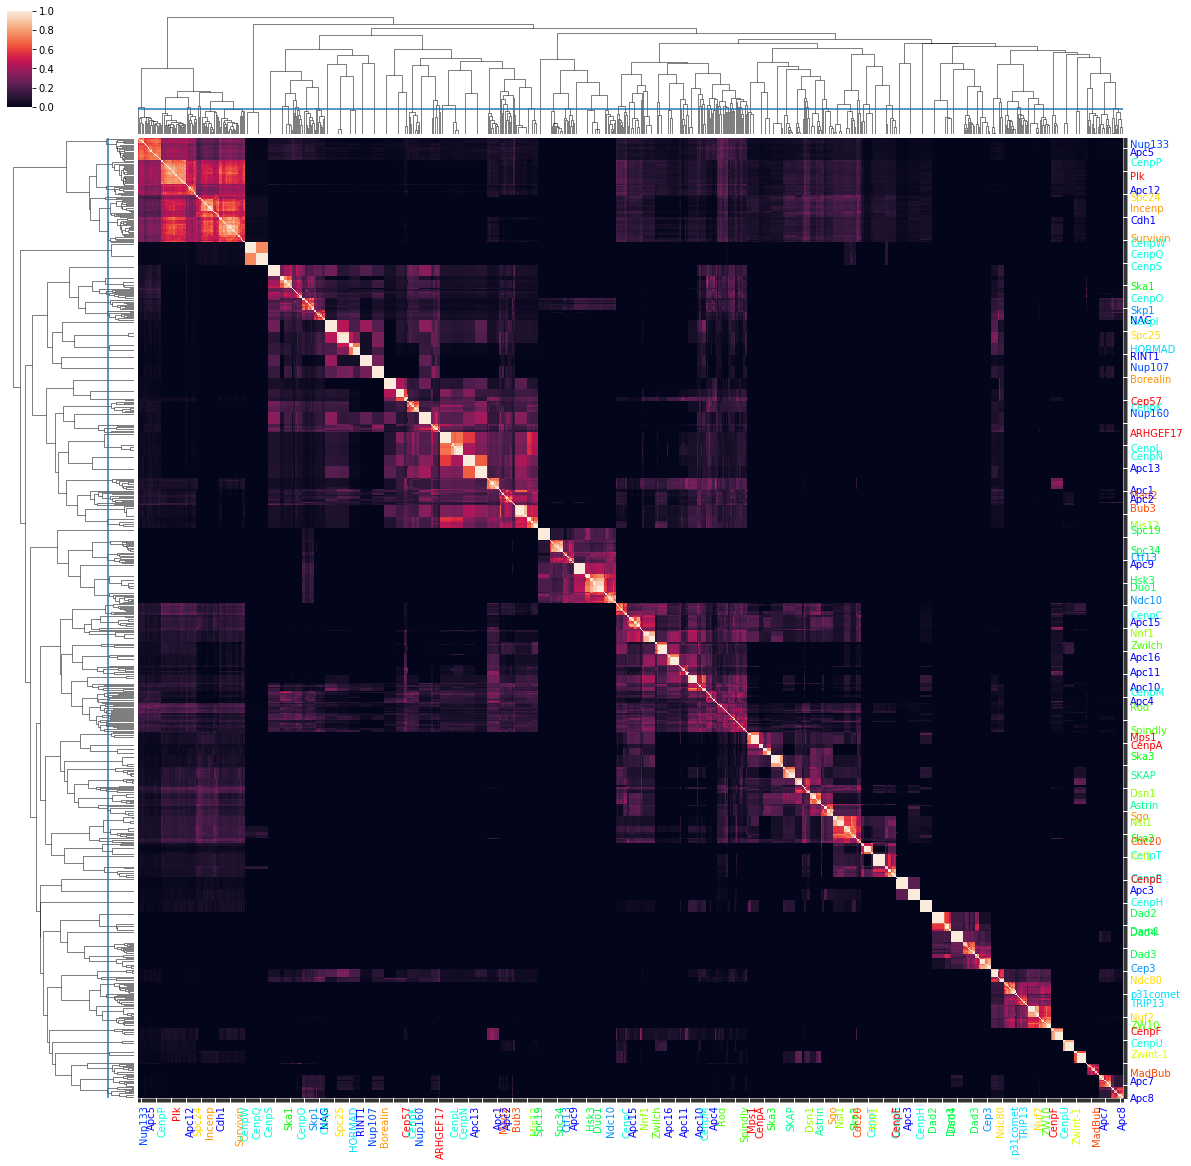

In [19]:
import scipy
with PdfPages('kineto_augment.pdf') as pdf:

    cutoff = 1.3
    z = scipy.cluster.hierarchy.linkage(jkern0, method='average', metric='euclidean')
    clusters = scipy.cluster.hierarchy.fcluster(z, t=cutoff, criterion='distance')
    colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
    colordict2 = dict( zip( list(set(clusters)) , list(colors)))
    rowcolors = [ colordict2[c] for c in clusters]

    print(np.unique(clusters).shape )

    g = sns.clustermap( jkern0 , xticklabels= profiles_full.name , yticklabels= profiles_full.name , figsize = (20,20) )
    colorcode = pd.DataFrame.from_csv('./colorcode_kineto.csv')
    red = colour.Color('red')
    blue = colour.Color('blue')
    colors = [ c.hex_l for c in red.range_to( blue , len(colorcode.complex_number.unique())) ]
    colordict = dict( zip( list(colorcode.index) , list(colorcode.complex_number)))
    colordict = { n:colors[colordict[n]] for n in colordict}
    red = colour.Color('red')
    blue = colour.Color('blue')


    g.ax_row_dendrogram.axvline(cutoff)
    g.ax_col_dendrogram.axhline(cutoff)

    for tick_label in g.ax_heatmap.axes.get_yticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)

    for tick_label in g.ax_heatmap.axes.get_xticklabels():
        l = tick_label.get_text()
        if l in colordict:
            c =colordict[l]
        else:
            c = '#000000'
        tick_label.set_color(c)   
    
    pdf.savefig()
    plt.show()


In [21]:
#we can enrich for functionality in each cluster
goares = {}
dfs = []
for c in list(np.unique(clusters)):
    sub = profiles_full.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ][0:5])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        study.wr_tsv(namestr + "_kinetocluster_enrich.tsv", goea_results_sig)
        try:
            res = pd.DataFrame.from_csv(namestr + "_kinetocluster_enrich.tsv" , sep= '\t' , header = None)
            res['queries'] = ''.join( [ n + ' ' for n in sub.name ])
            dfs.append(res)

        except:
            print('no res')
        print(len(goea_results_sig))

finaldf = pd.concat(dfs)
finaldf.to_csv('kineto_augment_goenrich.csv')
print('DONE')

['' 'Nup133' 'Apc5']
compiling hogs
0
10
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 281 IDs ...
100%    226 of    226 study items found in association
 80%    226 of    281 study items found in population(8270255)
Calculating 27,275 uncorrected p-values using fisher_scipy_stats
  27,275 GO terms are associated with 8,270,213 of 8,270,255 population items
      69 GO terms are associated with    226 of    281 study items
  METHOD fdr_bh:
      48 GO terms found significant (< 0.15=alpha) ( 30 enriched +  18 purified): statsmodels fdr_bh
     220 study items associated with significant GO IDs (enriched)
      23 study items associated with significant GO IDs (purified)
done
DONE!
     46 items WROTE: Nup133_Apc5__kinetocluster_enrich.tsv
46
['' 'Plk' 'CenpP']
compiling hogs
0


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


10
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 484 IDs ...
100%    380 of    380 study items found in association
 79%    380 of    484 study items found in population(8270255)
Calculating 27,275 uncorrected p-values using fisher_scipy_stats
  27,275 GO terms are associated with 8,270,213 of 8,270,255 population items
      83 GO terms are associated with    380 of    484 study items
  METHOD fdr_bh:
      66 GO terms found significant (< 0.15=alpha) ( 48 enriched +  18 purified): statsmodels fdr_bh
     345 study items associated with significant GO IDs (enriched)
       7 study items associated with significant GO IDs (purified)
done
DONE!
     65 items WROTE: Plk_CenpP__kinetocluster_enrich.tsv
65
['' 'Apc12']
compiling hogs
0
done
running GO enrichment study

Run GOEA Gene Ontology Analysis: current study set of 92 IDs ...
100%     65 of     65 study items found in association
 71%     65 of     92 study items found in population(8270255)

In [ ]:
#now lets look at a completely unknown network: sexual reproduction
#lets start with 3 queries of known proteins



In [23]:
#search Hap2 SPo11 Gex1
#mapping Hap2's uniprot ID to its OMA entry and querying with the OMA HOG
#we can use a pretty broad search to get the 100 closest profiles since we're only considering one HOG at a time
hap2= p.db_obj.id_resolver.resolve('f4jp36')
entry = p.db_obj.entry_by_entry_nr(hap2)
print(entry)
hap2hogs = p.hog_query(hog_id= str(entry[4]) ,  k=100)

#same for gex1
gex1= p.db_obj.id_resolver.resolve('A0A1P8B9F7')
entry = p.db_obj.entry_by_entry_nr(gex1)
print(entry)
gexhogs = p.hog_query(hog_id= str(entry[4]) , k=100)

#and spo11
spo11= p.db_obj.id_resolver.resolve('Q9M4A2')
entry = p.db_obj.entry_by_entry_nr(spo11)
print(entry)
spohogs = p.hog_query(hog_id= str(entry[4]) , k=100 )

(12398377, 4765549562, 706, 668654, b'HOG:0406399.2a.10b', b'4', 7063291, 7066784, 1, 0, b'HAP2_ARATH', 14309047062, 2119, b'64dcfddd880e7d4265a77286668f7be9', 630450286, 25, b'', -1, -1)
(12410572, 4770822388, 516, 489288, b'HOG:0416115.3a', b'5', 22479153, 22481071, -1, 12410572, b'A0A1P8B9F7', 14324877735, 1549, b'c9c8e5d3b55063acdc397a5f1cd18710', 630755194, 25, b'', -1, -1)
(12390911, 4762429318, 363, 831713, b'HOG:0605395.4b.6b', b'3', 4231560, 4234192, -1, 12390911, b'SPO11_ARATH', 14299678864, 1090, b'620e28803b4c72fae834a355cd77b6f3', 630263631, 25, b'', -1, -1)


In [ ]:
#reading in the sequence identifiers for all HOGs pulled down in a search from the HDF5 can take some time
goares = {}
#'hap':hap2hogs, 'gex':gexhogs,
searches = { 'spo':spohogs}
for res in searches:
    enrich = goa.run_GOEA_onresults( searches[res], p.db_obj, study)
    goea_results_sig = [r for r in enrich[0] if r.p_fdr_bh < 0.05]
    study.wr_tsv(res + "_enrich.tsv", goea_results_sig)

compiling hogs
0
10
20
30
40
50
60
70


In [ ]:
for res in goares:

    print(len(goea_results_sig))

In [ ]:
#And now let's try the same thing with a bigger list of candidate genes
#load reproduction pathway hogs. These were downloaded from the SGD database as tsv files by selecting salient go terms.
#I added a few non yeast entries and stuff from literature manually

hogdf = pd.DataFrame.from_csv('./repro_hogs.csv')
hogdf['HOG'] = hogdf['1'].map( grabHog )
hogdf = hogdf[ ~hogdf.HOG.isna() ]
hashes = p.pull_hashes( [h for h in hogdf.HOG if len(h)>0] )
hogdf['hashsig'] = hogdf.HOG.map(hashes)
hogdf = hogdf[ ~hogdf.hashsig.isnull() ]
hogdf = hogdf.drop_duplicates('3')
names = dict(zip( hogdf.HOG, hogdf['3']))
print(hogdf)

In [ ]:
#lets take a look at the clustering of our queries to see if some are coevolving and we can already notice some organisation
jkern2 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(hogdf.hashsig) ] for i,h1 in enumerate(hogdf.hashsig)]
jkern2 = np.asarray(jkern2)
jkern2+=jkern2.T
np.fill_diagonal(jkern2 , 1 )


In [ ]:
import seaborn as sns

In [ ]:
with PdfPages('repro_hash.pdf') as pdf:
    g = sns.clustermap( jkern2 , xticklabels= hogdf['3'] , yticklabels= hogdf['3'] , figsize = (25,25) )
    pdf.savefig()


In [ ]:
#now lets fill in our network with some putative interactors
res = { h: p.hog_query( hog_id=str(h) , k = 20 ) for h in hogdf.HOG}
Hogs = [ h for results in res.values() for h in results ] + list(res.keys())

In [ ]:
profiles = profiles = p.pull_hashes( set(Hogs) )
profiles = { h: {'hashsig': profiles[h] , 'name': names[h]  } if h in names else {'hashsig': profiles[h] , 'name': ''  }   for h in profiles }
profiles = pd.DataFrame.from_dict( profiles , orient='index' )

print(profiles.name.unique())
print(len(profiles.name.unique()))

print(len(profiles))




In [ ]:
#lets calculate a new jaccard kernel for all of our search results and queries 
#again we can divide our results into clusters and try to see if each has a functional signature using GO enrichment

jkern3 = [ [ h1.jaccard(h2) if i<j else 0 for j,h2 in enumerate(profiles.hashsig) ] for i,h1 in enumerate(profiles.hashsig)]
jkern3 = np.asarray(jkern3)

jkern3+=jkern3.T
np.fill_diagonal(jkern3 , 1 )




In [ ]:
print(jkern3)

In [ ]:
cutoff = 0.995
import scipy

z = scipy.cluster.hierarchy.linkage(jkern3, method='average', metric='euclidean')
clusters = scipy.cluster.hierarchy.fcluster(z, t=cutoff, criterion='distance')
print(clusters)

In [22]:
with PdfPages('repro_hash.pdf') as pdf:

    #colors = [ c.hex_l for c in red.range_to( blue , len(set(clusters)) ) ]
    #colordict2 = dict( zip( list(set(clusters)) , list(colors)))
    #rowcolors = [ colordict2[c] for c in clusters]
    g = sns.clustermap( jkern3 , xticklabels= profiles.name , yticklabels= profiles.name , figsize = (20,20)  )
    g.ax_row_dendrogram.axvline(cutoff)
    g.ax_col_dendrogram.axhline(cutoff)
   
    pdf.savefig()

    plt.show()
    

NameError: name 'jkern3' is not defined

In [ ]:
#and here we perform our enrichment of each cluster with a query in it
goares = {}
from pyprofiler.utils.hashutils import hogid2fam
dfs = []
for c in np.unique(clusters):
    sub = profiles.iloc[ np.where( clusters == c ) ]
    #if our cluster contains a query it makes sense to see if we found some interactors related to it
    if len(sub.name.unique()) >1 : 
        print(sub.name.unique())
        
        queries  = set(sub[ sub.index.map(lambda x : 'HOG' in x )].index )
        #remove the query from search results
        searchfams = [str(hogid2fam(h)) for h in queries ]
        searchres = sub[ sub.index.map(lambda x : 'HOG' not in x )]
        searchres  = searchres[~searchres.index.isin(searchfams)]
        #run a go enrichment study on the cluster
        goares[c] = goa.run_GOEA_onresults( searchres.index.map( hogid2fam ) , p.db_obj, study)
        namestr = ''.join([ n+'_' for n in sub.name if len(n)>0 ])
        #output the results
        goea_results_sig = [r for r in goares[c][0] if r.p_fdr_bh < 0.1]
        print(len(goea_results_sig))
        study.wr_tsv(namestr + "_reprocluster_enrich.tsv", goea_results_sig)
        try:
            res = pd.DataFrame.from_csv(namestr + "_reprocluster_enrich.tsv" , sep= '\t' , header = None)
            res['queries'] = ''.join( [ n + ' ' for  n in sub.name ])
            dfs.append( res)
        except:
            print('no res')
        print(len(goea_results_sig))

finaldf = pd.concat(dfs)
finaldf.to_csv('repro_augment_goenrich.csv')
print('DONE')